In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize

In [3]:



URL = 'https://api.frankfurter.app/2020-01-01..2023-08-31'
 
response = requests.get(URL)
data = response.json()

df = pd.DataFrame(data)

#Normalise the rates column
df_rates = json_normalize(df['rates'])

#reset the index
df = df.reset_index()

#drop rates column
df = df.drop('rates',axis = 1)

df = pd.concat([df,df_rates],axis = 1)

df


,index,amount,base,start_date,end_date,AUD,BGN,BRL,CAD,CHF,...,PHP,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR
0,2019-12-30,1.0,EUR,2019-12-30,2023-08-28,1.6018,1.9558,4.5070,1.4510,1.08520,...,56.904,4.2518,4.7806,69.154,10.4793,1.5066,33.678,6.6643,1.1170,15.8359
1,2020-01-06,1.0,EUR,2019-12-30,2023-08-28,1.6178,1.9558,4.5312,1.4504,1.08240,...,56.549,4.2437,4.7775,68.684,10.5336,1.5038,33.698,6.6069,1.1136,15.8655
2,2020-01-13,1.0,EUR,2019-12-30,2023-08-28,1.6130,1.9558,4.6229,1.4533,1.07610,...,56.447,4.2305,4.7795,68.366,10.5513,1.4993,33.720,6.5387,1.1132,16.0450
3,2020-01-20,1.0,EUR,2019-12-30,2023-08-28,1.6158,1.9558,4.6369,1.4511,1.07370,...,56.457,4.2451,4.7790,68.486,10.5487,1.4954,33.746,6.5705,1.1083,15.9956
4,2020-01-27,1.0,EUR,2019-12-30,2023-08-28,1.6357,1.9558,4.6549,1.4551,1.07010,...,56.104,4.2833,4.7784,69.386,10.6141,1.5001,34.150,6.5737,1.1022,16.1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-07-31,1.0,EUR,2019-12-30,2023-08-28,1.6625,1.9558,5.2693,1.4605,0.96096,...,60.625,4.4386,4.9386,NaN,11.6723,1.4675,37.779,29.5870,1.0971,20.0750
188,2023-08-07,1.0,EUR,2019-12-30,2023-08-28,1.6788,1.9558,5.3754,1.4748,0.96174,...,61.825,4.4445,4.9461,NaN,11.7255,1.4787,38.417,29.6860,1.0984,20.6830
189,2023-08-14,1.0,EUR,2019-12-30,2023-08-28,1.6913,1.9558,5.4108,1.4724,0.95850,...,61.814,4.4645,4.9401,NaN,11.8625,1.4802,38.539,29.5330,1.0908,20.8180
190,2023-08-21,1.0,EUR,2019-12-30,2023-08-28,1.6872,1.9558,5.3345,1.4693,0.95606,...,61.372,4.4732,4.9388,NaN,11.8982,1.4709,38.047,29.1640,1.0850,20.3370


In [5]:
# Function to get exchange rate data from the Frankfurter API
def get_exchange_rates(base_currency, target_currency, start_date, end_date):
    api_url = f'https://api.frankfurter.app/{start_date}..{end_date}?from={base_currency}&to={target_currency}'
    response = requests.get(api_url)
    data = response.json()
    df = pd.DataFrame(data['rates']).transpose()
    return df

## 1.	How has the exchange rate of the Euro (EUR) against the US Dollar (USD) changed over time?
-	Visua lization:A line cha rt showingthe exchange rate for EUR to
USD


In [6]:
# Call my function with arguements 'EUR', 'USD', '2013-01-01', '2023-01-01' 
exchange_rates_df = get_exchange_rates('EUR', 'USD', '2013-01-01', '2023-01-01')
exchange_rates_df

,USD
2012-12-31,1.3125
2013-01-07,1.3114
2013-01-14,1.3327
2013-01-21,1.3358
2013-01-28,1.3522
...,...
2022-11-28,1.0439
2022-12-05,1.0542
2022-12-12,1.0599
2022-12-19,1.0618


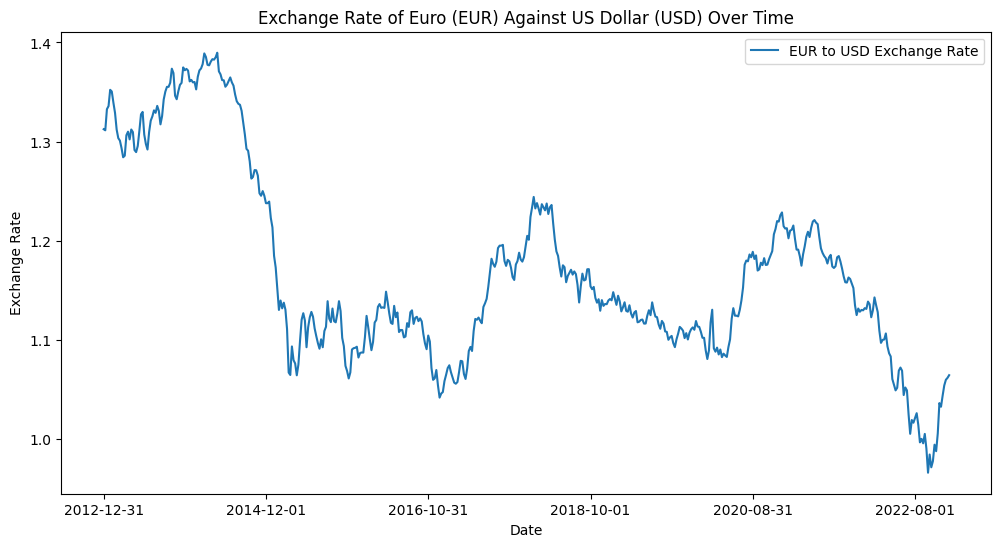

In [7]:
# Data Analysis and Visualization for Question 1
# Line chart showing the exchange rate for EUR to USD over time
plt.figure(figsize=(12, 6))
exchange_rates_df['USD'].plot(label='EUR to USD Exchange Rate')
plt.title('Exchange Rate of Euro (EUR) Against US Dollar (USD) Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [9]:
# Call my function with arguements 'CNY', 'EUR', '2013-01-01', '2023-01-01' 
exchange_rates_df = get_exchange_rates('CNY', 'EUR', '2013-01-01', '2023-01-01')
exchange_rates_df

,EUR
2012-12-31,0.12223
2013-01-07,0.12251
2013-01-14,0.12065
2013-01-21,0.12034
2013-01-28,0.11881
...,...
2022-11-28,0.13477
2022-12-05,0.13611
2022-12-12,0.13537
2022-12-19,0.13497


## 2.	What is the distribution of exchange rates for the Chinese Yuan (CNY) against the Euro (EUR)

- Visualization:Histogra m or kernel density plot for the distribution of CNY to EUR exchange rates.


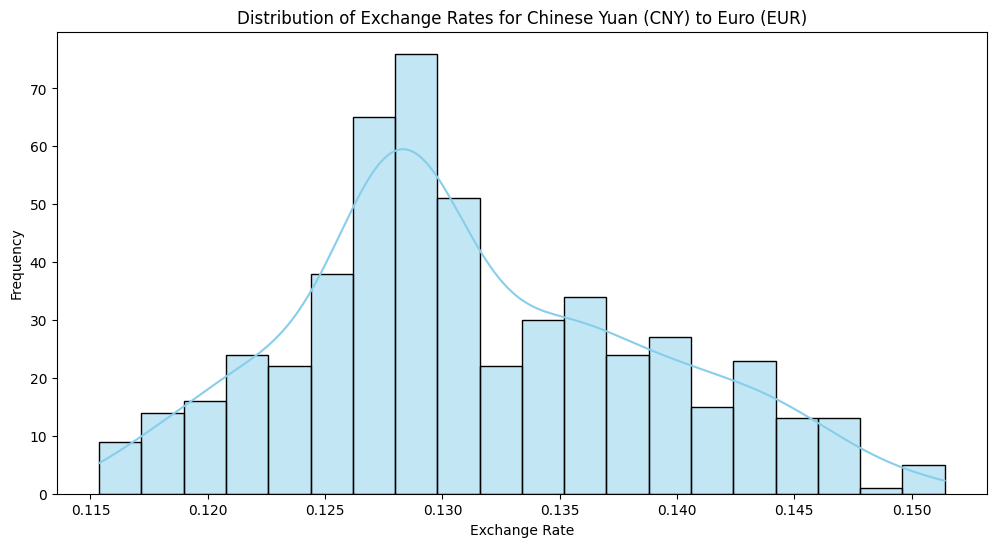

In [8]:


# Data Analysis and Visualization for Question 2
# Histogram for the distribution of CNY to EUR exchange rates
plt.figure(figsize=(12, 6))
sns.histplot(exchange_rates_df['EUR'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Exchange Rates for Chinese Yuan (CNY) to Euro (EUR)')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Example usage:
# Call my function with arguements  'GBP', 'JPY', '2013-01-01', '2023-01-01' 
exchange_rates_df = get_exchange_rates('GBP', 'JPY', '2013-01-01', '2019-12-30')
exchange_rates_df

,JPY
2012-12-31,141.27
2013-01-07,141.44
2013-01-14,142.55
2013-01-21,141.87
2013-01-28,143.85
...,...
2019-12-02,142.16
2019-12-09,143.67
2019-12-16,143.86
2019-12-23,142.21


In [29]:
exchange_rates_df.describe().T

,count,mean,std,min,25%,50%,75%,max
JPY,366.0,155.789426,17.393566,126.94,142.6625,149.975,171.2875,194.9



## 3.	Between the Great British Pound (GBP) and the Japanese Yen (JPY) determine which country's currency is more volatile
- Visualization:Bar chart comparingthe volatility of the selected currencies.


In [49]:
exchange_rates = pd.DataFrame(df)

# Display the values in the 'GBP' column
volatility_gbp = exchange_rates['GBP'].std()
volatility_jpy = exchange_rates['JPY'].std()
print(volatility_jpy)
print(volatility_gbp)


10.398152080334025
0.022160187013443


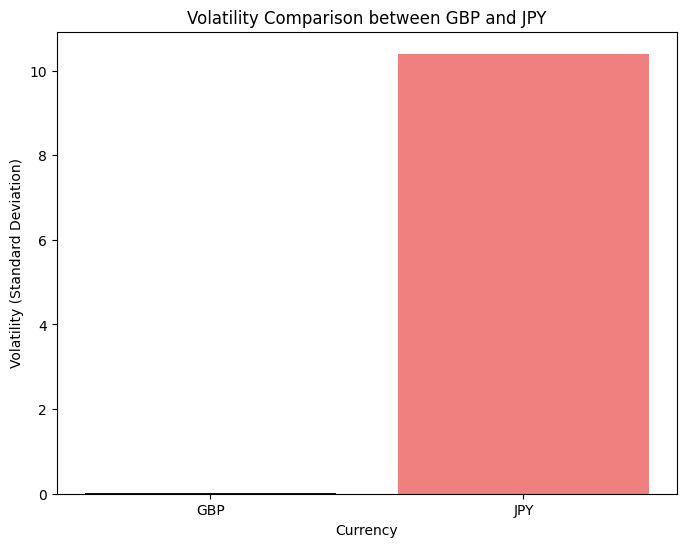

In [54]:

# Bar chart comparing the volatility of GBP and JPY
plt.figure(figsize=(8, 6))
currencies = ['GBP', 'JPY']
volatilities = [volatility_gbp, volatility_jpy]
plt.bar(currencies, volatilities, color=['darkblue', 'lightcoral'])
plt.title('Volatility Comparison between GBP and JPY')
plt.xlabel('Currency')
plt.ylabel('Volatility (Standard Deviation)')
plt.show()


## 4.	Is there a correlation between the exchange rates of the Canadian Dollar (CAD) and the American Dollar (USO)??
- Visualization:Scatter plot with CAD to USO and data points representing the exchange rates.


In [65]:
correlation = exchange_rates2['CAD'].corr(exchange_rates2['USD'])
print(f"Correlation between CAD and USD: {correlation}")

Correlation between CAD and USD: 0.7603935181158795


In [63]:
exchange_rates2 = pd.DataFrame(df)
print(f" The exchange rate for The Canadian Dollar is \n{exchange_rates2['CAD']}")
print(f" The exchange rate for The American Dollar is \n{exchange_rates2['USD']}")


 The exchange rate for The Canadian Dollar is 
0      1.4510
1      1.4504
2      1.4533
3      1.4511
4      1.4551
        ...  
187    1.4605
188    1.4748
189    1.4724
190    1.4693
191    1.4725
Name: CAD, Length: 192, dtype: float64
 The exchange rate for The American Dollar is 
0      1.1170
1      1.1136
2      1.1132
3      1.1083
4      1.1022
        ...  
187    1.0971
188    1.0984
189    1.0908
190    1.0850
191    1.0841
Name: USD, Length: 192, dtype: float64


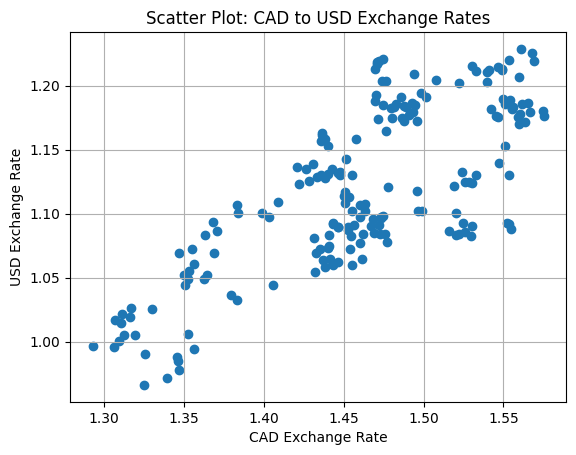

In [64]:


# Scatter plot for CAD and USD
plt.scatter(exchange_rates2['CAD'], exchange_rates2['USD'])
plt.title('Scatter Plot: CAD to USD Exchange Rates')
plt.xlabel('CAD Exchange Rate')
plt.ylabel('USD Exchange Rate')
plt.grid(True)
plt.show()